# Live Price

In [2]:
from bs4 import BeautifulSoup
import requests

In [3]:
import yfinance as yf
import numpy as np
import pandas as pd

In [4]:
def get_quote(tickers: list[str]) -> dict[str, float]:
    prices: dict[str, float] = {}
    
    for ticker in tickers:
        url = 'https://finance.yahoo.com/quote/' + ticker + '?p=' + ticker
        page = requests.get(url)
        soup = BeautifulSoup(page.content, 'html.parser')
        quote_header = soup.find(id='quote-header-info')
        smth = quote_header.find_all(class_='My(6px)')
        text = smth[0].get_text()
        price = float( text.split()[0].split('-')[0].split('+')[0]) 
        prices[ticker] = price
        
    return prices

In [5]:
get_quote(['GNS'])

{'GNS': 1.158}

In [98]:
def also_get_quote(ticker):
    price = yf.download(tickers=ticker , period='1m', interval='1m')
    return price.iloc[0]['Close']

In [99]:
also_get_quote('AAPL')

[*********************100%***********************]  1 of 1 completed


154.5

# Live Graph

In [3]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style

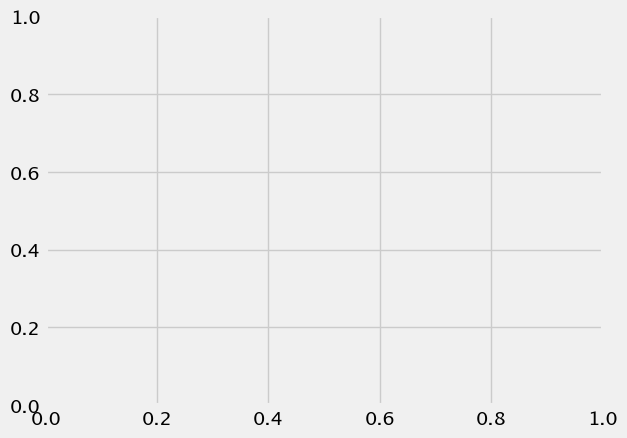

In [4]:
style.use('fivethirtyeight')

fig = plt.figure()
chart = fig.add_subplot(1,1,1)

In [5]:
def animate(ticker):
    price = get_quote([ticker])[ticker]
    while True:
        x = 1.0
        chart.plot(x, price)
        x += 1.0

In [6]:
ani = animation.FuncAnimation(fig, animate('AAPL'), interval=1000)
plt.show()

NameError: name 'get_quote' is not defined

In [1]:
import random
from itertools import count
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

plt.style.use('fivethirtyeight')

x_vals = []
y_vals = []

index = count()


def animate(i):
    data = pd.read_csv('data.csv')
    x = data['x_value']
    y1 = data['total_1']
    y2 = data['total_2']

    plt.cla()

    plt.plot(x, y1, label='Channel 1')
    plt.plot(x, y2, label='Channel 2')

    plt.legend(loc='upper left')
    plt.tight_layout()


ani = FuncAnimation(plt.gcf(), animate, interval=1000)

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>